In [8]:
import matplotlib.pyplot as plt
from data import DataProvider

In [9]:
provider = DataProvider()
raw_df = provider.read_excel()
scaled_df = provider.scale_data(raw_df)

scaled_df.head()

,Timestamp,Battery Voltage(V),Battery Current(A),SoC(%),BMS Temperature(℃),time_diff_sec,SoC
1,2025-02-10 22:12:37,52.5750,0.29,74,20.0,5.0,0.74
2,2025-02-10 22:18:14,52.5750,0.29,74,20.0,5.0,0.74
3,2025-02-10 22:23:51,52.6000,-0.04,74,20.0,5.0,0.74
4,2025-02-10 22:29:28,52.6000,0.00,74,20.0,5.0,0.74
5,2025-02-10 22:35:05,52.6125,-0.03,74,20.0,5.0,0.74


C:\Users\dimaherez\AppData\Local\Temp\ipykernel_4360\1554899371.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


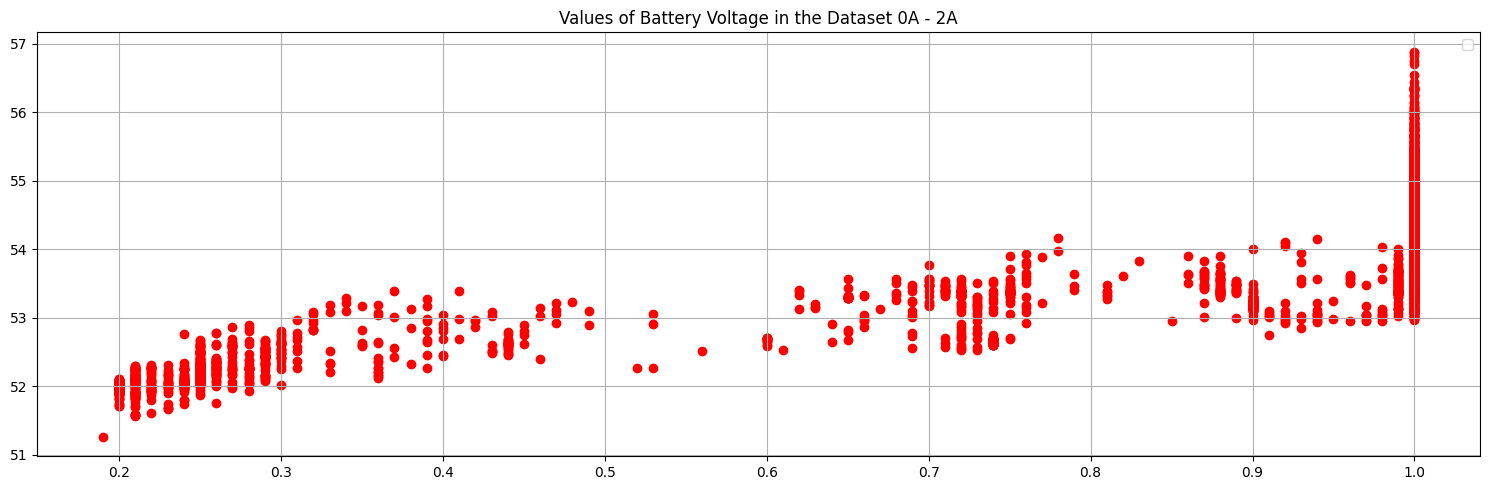

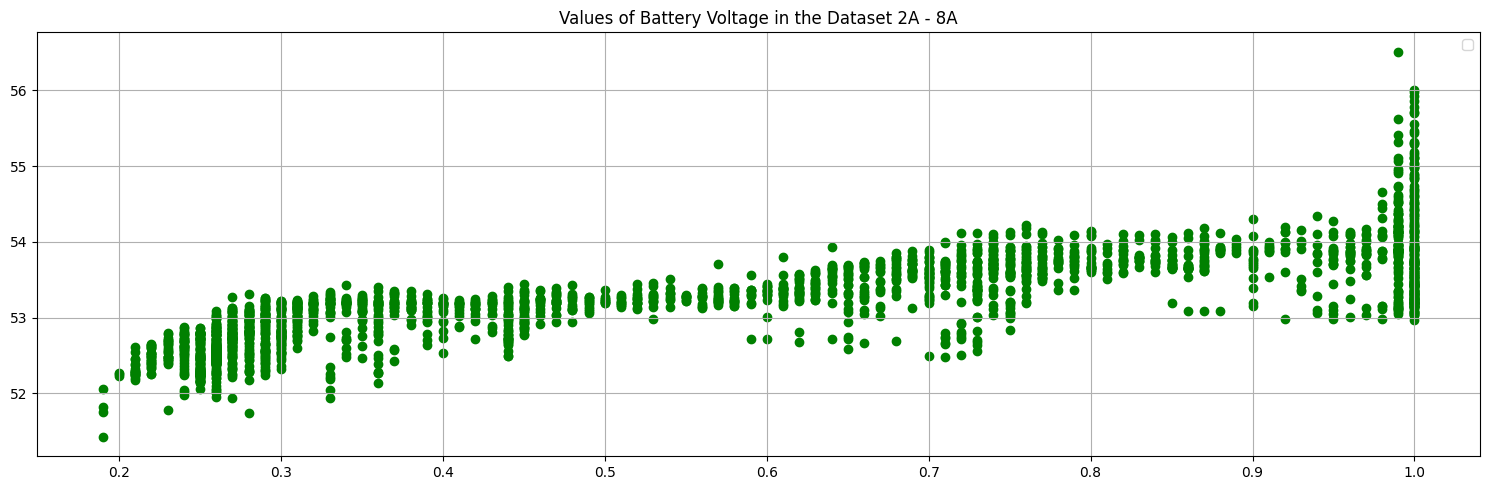

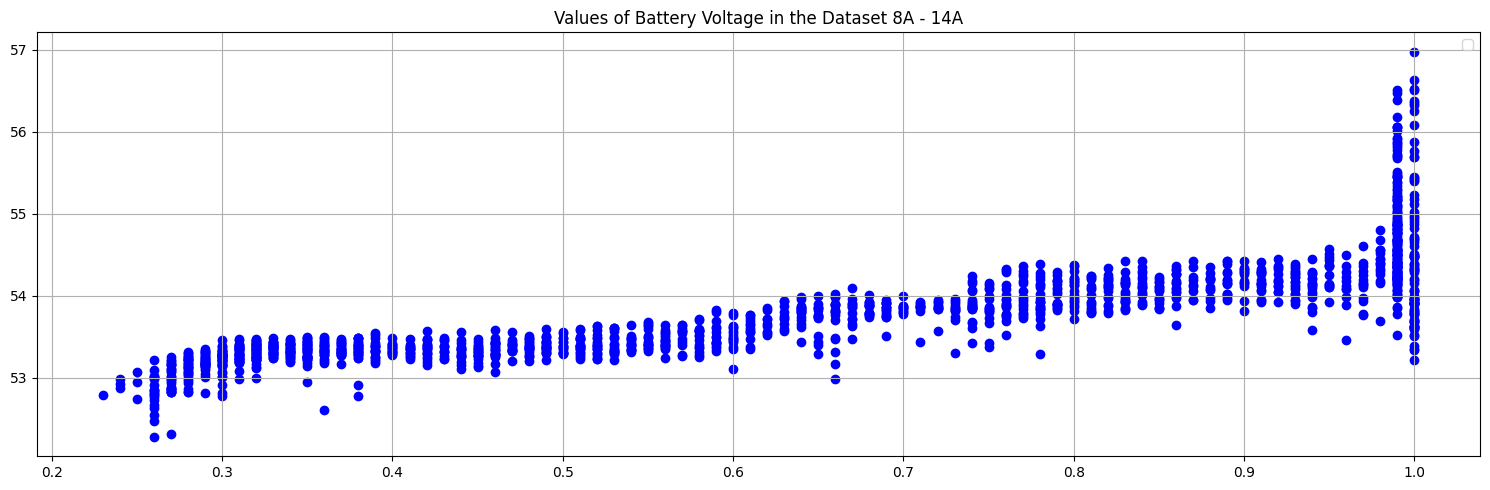

In [12]:
charging_df_0_2 = provider.get_charging_data(scaled_df, 0, -2)
charging_df_2_8 = provider.get_charging_data(scaled_df, -2, -8)
charging_df_8_14 = provider.get_charging_data(scaled_df, -8, -14)

charging_dfs = [charging_df_0_2, charging_df_2_8, charging_df_8_14]
rangesStrings = ["0A - 2A", "2A - 8A", "8A - 14A"]
colors = ["red", "green", "blue"]

for i, df in enumerate(charging_dfs):
    plt.figure(figsize=(15, 5))
    plt.scatter(
            df["SoC"], 
            df["Battery Voltage(V)"], 
            marker='o',  
            color=colors[i]
        )
    plt.title(f'Values of Battery Voltage in the Dataset {rangesStrings[i]}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

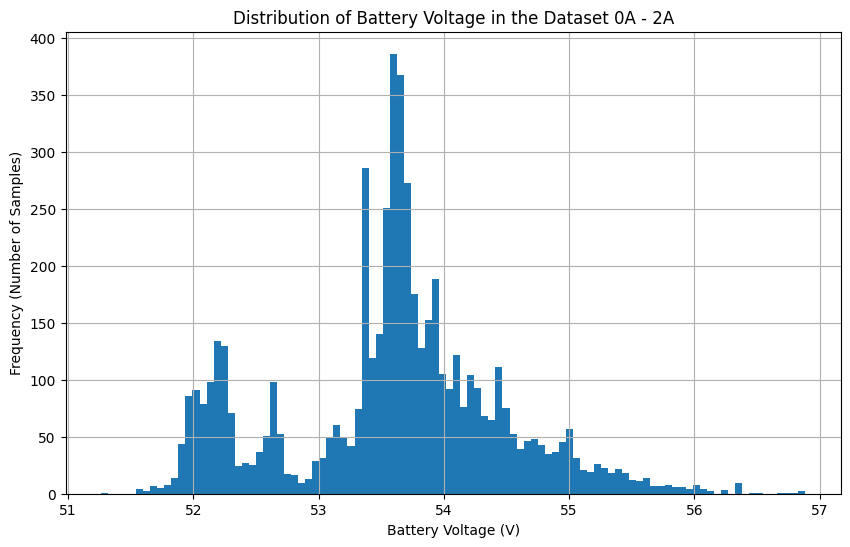

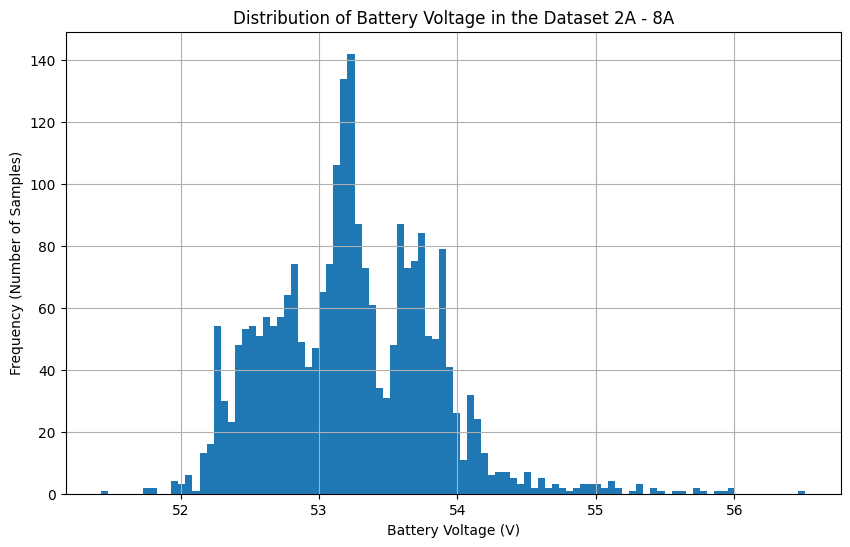

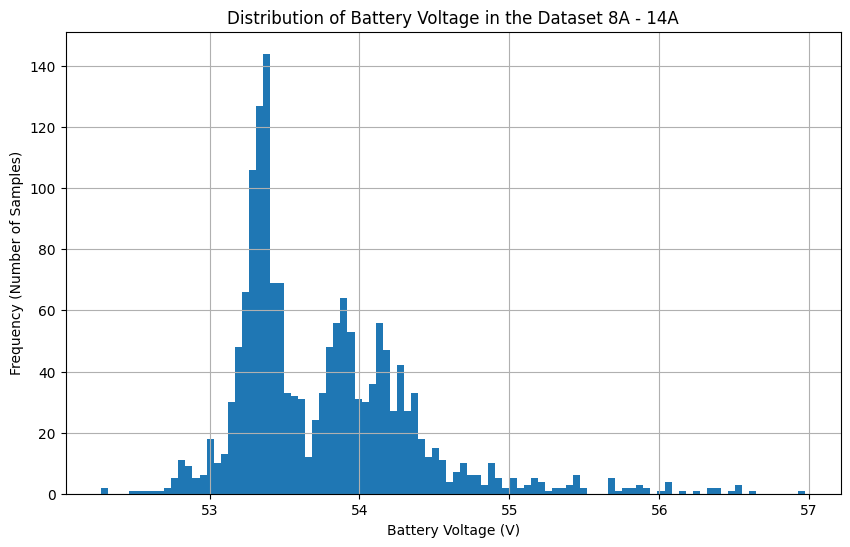

In [13]:
for i, df in enumerate(charging_dfs):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Battery Voltage(V)'], bins=100)
    plt.title(f'Distribution of Battery Voltage in the Dataset {rangesStrings[i]}')
    plt.xlabel('Battery Voltage (V)')
    plt.ylabel('Frequency (Number of Samples)')
    plt.grid(True)
    plt.show()